# Inspecionando os dataframes

In [1]:
#Importando bibliotecas
import pyodbc
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv("autoscout24-germany-dataset.csv")


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46405 entries, 0 to 46404
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mileage    46405 non-null  int64  
 1   make       46405 non-null  object 
 2   model      46262 non-null  object 
 3   fuel       46405 non-null  object 
 4   gear       46223 non-null  object 
 5   offerType  46405 non-null  object 
 6   price      46405 non-null  int64  
 7   hp         46376 non-null  float64
 8   year       46405 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 3.2+ MB


In [5]:
df.head(1)

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011


In [6]:
df.isnull().sum()

mileage        0
make           0
model        143
fuel           0
gear         182
offerType      0
price          0
hp            29
year           0
dtype: int64

In [7]:
print("\nFeatures da base\n",df.columns.to_list())


Features da base
 ['mileage', 'make', 'model', 'fuel', 'gear', 'offerType', 'price', 'hp', 'year']


In [8]:
print("\nValores unicos: \n", df.nunique())


Valores unicos: 
 mileage      20117
make            77
model          841
fuel            11
gear             3
offerType        5
price         6668
hp             328
year            11
dtype: int64


# Explorando o dataset

In [ ]:
# Heatmap não está funcionando
sns.heatmap(df, annot=False , cmap='viridis', fmt='d')
plt.xlabel('Teste X')
plt.ylabel('Teste y')
plt.show()

<Axes: xlabel='fuel', ylabel='count'>

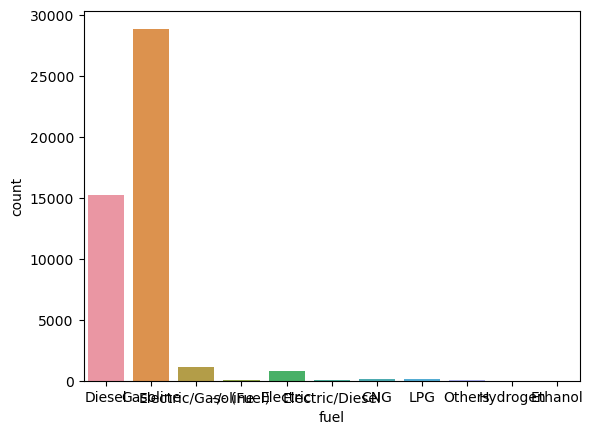

In [10]:
sns.countplot(data=df, x='fuel')

In [11]:
# O carros com outros tipos de combustiveis tirando Gasolina e Diesel não correspondem nem a 3% do dateset
df['fuel'].value_counts()

fuel
Gasoline             28864
Diesel               15244
Electric/Gasoline     1158
Electric               758
LPG                    126
CNG                    117
Others                  56
Electric/Diesel         53
-/- (Fuel)              26
Ethanol                  2
Hydrogen                 1
Name: count, dtype: int64

In [12]:
df['fuel'].count()

46405

In [13]:
#Explorando todas as marcas que há nas bases
print("Valores unicos das marcas",df['make'].nunique())

print("Todas as marcas listadas no Dataset", df['make'].unique())

Valores unicos das marcas 77
Todas as marcas listadas no Dataset ['BMW' 'Volkswagen' 'SEAT' 'Renault' 'Peugeot' 'Toyota' 'Opel' 'Mazda'
 'Ford' 'Mercedes-Benz' 'Chevrolet' 'Audi' 'Fiat' 'Kia' 'Dacia' 'MINI'
 'Hyundai' 'Skoda' 'Citroen' 'Infiniti' 'Suzuki' 'SsangYong' 'smart'
 'Cupra' 'Volvo' 'Jaguar' 'Porsche' 'Nissan' 'Honda' 'Lada' 'Mitsubishi'
 'Others' 'Lexus' 'Jeep' 'Maserati' 'Bentley' 'Land' 'Alfa' 'Subaru'
 'Dodge' 'Microcar' 'Lamborghini' 'Baic' 'Tesla' 'Chrysler' '9ff'
 'McLaren' 'Aston' 'Rolls-Royce' 'Alpine' 'Lancia' 'Abarth' 'DS'
 'Daihatsu' 'Ligier' 'Ferrari' 'Caravans-Wohnm' 'Aixam' 'Piaggio' 'Zhidou'
 'Morgan' 'Maybach' 'Tazzari' 'Trucks-Lkw' 'RAM' 'Iveco' 'DAF' 'Alpina'
 'Polestar' 'Brilliance' 'FISKER' 'Cadillac' 'Trailer-Anhänger' 'Isuzu'
 'Corvette' 'DFSK' 'Estrima']


In [24]:
#Explorando os Potencia em cavalos para ver se possuimos outliers
print("Todos os Horsepowers listados", df['hp'].unique())

Todos os Horsepowers listados [116. 122. 160. 110. 156.  99. 131. 150.  86. 101. 105. 204. 141. 120.
  60. 135. 143. 140. 163. 179. 125.  90. 109.  98. 184. 102. 126.  80.
 136. 190. 170.  94. 178.  69.  87. 200. 252. 333.  71.  67.  95.  75.
 272. 218. 231. 239. 300. 224. 320. 354. 286. 370. 235. 265. 211. 367.
 400. 381. 245. 347. 340.  72.  84. 117. 132. 124.  82.  92. 128.  58.
  73. 106. 182. 326.  38. 194. 313. 392. 199. 551.  54.  88.  61.  68.
  97.  77.  nan 258. 155. 349. 310. 254. 220. 209. 250. 177. 238. 114.
 280. 230. 185. 181. 212. 111. 334. 460. 635. 192. 435. 450. 421. 455.
 165. 237. 360. 408. 341. 253. 390. 145. 166.  83.  91. 175. 147. 152.
  76.  65. 167. 173. 118. 462. 306. 449. 188. 717. 510. 600.   5. 121.
 197. 330. 262. 700. 476. 401. 575. 159. 151.  11. 223. 612. 241. 441.
 457. 480. 560. 557. 598. 620. 129. 174. 207. 374. 292. 249. 299. 625.
 650. 420. 549. 513. 144. 287. 186.  20. 303. 571. 562. 570. 446. 430.
 201. 363. 275. 260. 203. 264. 337.  48. 394. 4

In [15]:
#Transformar a coluna de Cambio em One-Hot-Encoding?

df['gear'].value_counts()

gear
Manual            30380
Automatic         15787
Semi-automatic       56
Name: count, dtype: int64

In [16]:
# É melhor trabalhar com carros usados mesmo

# Carros da categoria "Pre-registered" são basicamente carros novos 
df['offerType'].value_counts()

offerType
Used              40122
Pre-registered     2780
Demonstration      2368
Employee's car     1122
New                  13
Name: count, dtype: int64

In [17]:
#Explorando os valores minimos e máximos dos nosso preços
df['price'].max()
df['price'].min()

1199900

In [20]:
#Entendendo quais modelos nós mais temos nas bases
df['model'].value_counts()

model
Golf                         1492
Corsa                        1491
Fiesta                       1289
Astra                        1191
Focus                         985
                             ... 
S60 Cross Country               1
John Cooper Works Clubman       1
323                             1
Rodius                          1
NV250                           1
Name: count, Length: 841, dtype: int64

# Tratando o dataset

In [28]:
df.isnull().sum()

mileage      0
make         0
model        0
fuel         0
gear         0
offerType    0
price        0
hp           0
year         0
dtype: int64

In [27]:
df.dropna(inplace=True)

In [29]:
df.to_csv('dataset-autoscout24-limpo.csv')

# Buscando boas transformações

In [4]:
carros=pd.read_csv('dataset-autoscout24-limpo.csv')
carros.describe()

In [8]:
subset_modelo=carros[['model','make']].nunique()
print(subset_modelo)

model    835
make      71
dtype: int64


In [5]:
#Tentando agrupar os dados apenas por uma marca
marca_desejada='Toyota'
modelo_desejado='Yaris'
modelos_da_marca = carros.loc[carros['make'] == marca_desejada, 'model'].unique()
print(f"Modelos da marca {marca_desejada}: {modelos_da_marca}")


Modelos da marca Toyota: ['Auris' 'Verso' 'Yaris' 'Aygo' 'Avensis' 'Camry' 'C-HR' 'Prius' 'GT86'
 'RAV 4' 'Corolla' 'Verso-S' 'Supra' 'Urban Cruiser' 'iQ' 'Proace'
 'Prius+' 'Mirai' 'Land Cruiser' 'Highlander' 'Hilux']


In [7]:
carros_filtrados = carros.query("model == @modelo_desejado")
print(carros_filtrados)

       Unnamed: 0  mileage    make  model               fuel       gear  \
63             63    84600  Toyota  Yaris  Electric/Gasoline  Automatic   
72             72    84721  Toyota  Yaris           Gasoline  Automatic   
104           104    70604  Toyota  Yaris           Gasoline     Manual   
105           105    68656  Toyota  Yaris           Gasoline     Manual   
106           106    64783  Toyota  Yaris           Gasoline     Manual   
...           ...      ...     ...    ...                ...        ...   
43284       43579    16707  Toyota  Yaris           Gasoline     Manual   
43289       43584    22682  Toyota  Yaris           Gasoline     Manual   
43338       43635    16000  Toyota  Yaris  Electric/Gasoline  Automatic   
43403       43702    17671  Toyota  Yaris           Gasoline  Automatic   
45214       45535       10  Toyota  Yaris           Gasoline     Manual   

            offerType  price     hp  year  
63               Used   8990  143.0  2014  
72         

In [11]:
modelos_unicos = carros_filtrados['model'].unique()

# Filtrando novamente o DataFrame para incluir apenas os modelos únicos
carros_filtrados_modelos_unicos = carros_filtrados[carros_filtrados['model'].isin(modelos_unicos)]

# Exibindo o DataFrame resultante
print(carros_filtrados_modelos_unicos)

       Unnamed: 0  mileage    make  model               fuel       gear  \
5               5   147000  Toyota  Auris  Electric/Gasoline  Automatic   
58             58   169500  Toyota  Verso             Diesel     Manual   
63             63    84600  Toyota  Yaris  Electric/Gasoline  Automatic   
72             72    84721  Toyota  Yaris           Gasoline  Automatic   
104           104    70604  Toyota  Yaris           Gasoline     Manual   
...           ...      ...     ...    ...                ...        ...   
45281       45602       10  Toyota   Aygo           Gasoline  Automatic   
45579       45902     2500  Toyota   Aygo           Gasoline     Manual   
46020       46354       25  Toyota   Aygo           Gasoline     Manual   
46021       46355       25  Toyota   Aygo           Gasoline     Manual   
46022       46356       50  Toyota   Aygo           Gasoline     Manual   

            offerType  price     hp  year  
5                Used   6950   99.0  2011  
58         

# Dividindo os CSV para filtrar apenas as informações dos modelos

In [22]:
coluna='offerType'
coluna2='price'
coluna3='mileage'
carros_so_modelos= carros.drop(coluna,axis=1)
carros_so_modelos2= carros_so_modelos.drop(coluna2,axis=1)
carros_so_modelos3= carros_so_modelos2.drop(coluna3,axis=1)

In [27]:
carros_so_modelos3.info()
carros_so_modelos3.to_csv('dataset-modelos.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46071 entries, 0 to 46070
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  46071 non-null  int64  
 1   make        46071 non-null  object 
 2   model       46071 non-null  object 
 3   fuel        46071 non-null  object 
 4   gear        46071 non-null  object 
 5   hp          46071 non-null  float64
 6   year        46071 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 2.5+ MB


# Pesquisando como os modelos podem ser encaixados no banco

In [42]:
modelos=pd.read_csv('dataset-modelos.csv')
print(modelos)

       Unnamed: 0.1  Unnamed: 0        make   model               fuel  \
0                 0           0         BMW     316             Diesel   
1                 1           1  Volkswagen    Golf           Gasoline   
2                 2           2        SEAT    Exeo           Gasoline   
3                 3           3     Renault  Megane           Gasoline   
4                 4           4     Peugeot     308           Gasoline   
...             ...         ...         ...     ...                ...   
46066         46066       46400        Fiat     500  Electric/Gasoline   
46067         46067       46401        Fiat     500  Electric/Gasoline   
46068         46068       46402        Fiat     500  Electric/Gasoline   
46069         46069       46403        Fiat     500  Electric/Gasoline   
46070         46070       46404        Fiat     500  Electric/Gasoline   

         gear     hp  year  
0      Manual  116.0  2011  
1      Manual  122.0  2011  
2      Manual  160.0  20

In [37]:
#Separando o dataset pelas marcas já predefinidas
marca_desejada='BMW'
carros_filtrados = modelos.query("make == @marca_desejada")

print(carros_filtrados)

carros_filtrados.to_csv('dataset-bmw.csv', index=False)

       Unnamed: 0.1  Unnamed: 0 make model      fuel       gear     hp  year
0                 0           0  BMW   316    Diesel     Manual  116.0  2011
26               26          26  BMW   118    Diesel     Manual  143.0  2012
29               29          29  BMW   118    Diesel     Manual  143.0  2012
33               33          33  BMW   118    Diesel     Manual  143.0  2012
39               39          39  BMW   320    Diesel  Automatic  184.0  2012
...             ...         ...  ...   ...       ...        ...    ...   ...
45603         45603       45929  BMW    i3  Electric  Automatic  102.0  2021
45956         45956       46288  BMW    M4  Gasoline  Automatic  510.0  2021
45963         45963       46295  BMW    X1  Gasoline  Automatic  192.0  2021
46013         46013       46347  BMW  X3 M    Diesel  Automatic  340.0  2021
46014         46014       46348  BMW   340  Gasoline  Automatic  374.0  2021

[2392 rows x 8 columns]


In [38]:
modelos_sem_duplicatas = modelos.drop_duplicates(subset=['model'], keep='last')

In [44]:
print(modelos_sem_duplicatas)
modelos_sem_duplicatas.to_csv('dataset-all-drop-duplicates.csv')

       Unnamed: 0.1  Unnamed: 0           make          model  \
758             758         763  Mercedes-Benz        GLS 500   
2158           2158        2169       Maserati    GranTurismo   
2674           2674        2690        Renault        Express   
3388           3388        3408       Chrysler  Grand Voyager   
3616           3616        3638     Volkswagen     Cross Golf   
...             ...         ...            ...            ...   
46057         46057       46391     Mitsubishi     Space Star   
46061         46061       46395        Citroen             C1   
46064         46064       46398           Fiat          Panda   
46065         46065       46399          Skoda          Fabia   
46070         46070       46404           Fiat            500   

                    fuel       gear     hp  year  
758             Gasoline  Automatic  455.0  2019  
2158            Gasoline  Automatic  460.0  2016  
2674            Gasoline     Manual  101.0  2021  
3388           

In [3]:
teste=pd.read_csv('dataset-all-drop-duplicates.csv')


In [4]:
teste.

Unnamed: 0.2    835
Unnamed: 0.1    835
Unnamed: 0      835
make             70
model           835
fuel              9
gear              2
hp              217
year             11
dtype: int64

In [5]:
teste2=pd.read_csv('autoscout24-germany-dataset.csv')

In [9]:
teste2

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011
...,...,...,...,...,...,...,...,...,...
46400,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46401,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46402,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46403,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021


In [8]:
teste

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,make,model,fuel,gear,hp,year
0,758,758,763,Mercedes-Benz,GLS 500,Gasoline,Automatic,455.0,2019
1,2158,2158,2169,Maserati,GranTurismo,Gasoline,Automatic,460.0,2016
2,2674,2674,2690,Renault,Express,Gasoline,Manual,101.0,2021
3,3388,3388,3408,Chrysler,Grand Voyager,Gasoline,Automatic,287.0,2013
4,3616,3616,3638,Volkswagen,Cross Golf,Gasoline,Manual,160.0,2014
...,...,...,...,...,...,...,...,...,...
830,46057,46057,46391,Mitsubishi,Space Star,Gasoline,Manual,71.0,2021
831,46061,46061,46395,Citroen,C1,Gasoline,Manual,72.0,2021
832,46064,46064,46398,Fiat,Panda,Electric/Gasoline,Manual,69.0,2021
833,46065,46065,46399,Skoda,Fabia,Gasoline,Manual,60.0,2021


In [10]:
# Remover a coluna "Unnamed"
teste = teste.loc[:, ~teste.columns.str.contains('^Unnamed')]

In [11]:
teste.to_csv('dataset-all-drop-duplicates-sem-unnamed.csv', index=False)

In [12]:
teste3=pd.read_csv('dataset-all-drop-duplicates-sem-unnamed.csv')

In [13]:
teste3

,make,model,fuel,gear,hp,year
0,Mercedes-Benz,GLS 500,Gasoline,Automatic,455.0,2019
1,Maserati,GranTurismo,Gasoline,Automatic,460.0,2016
2,Renault,Express,Gasoline,Manual,101.0,2021
3,Chrysler,Grand Voyager,Gasoline,Automatic,287.0,2013
4,Volkswagen,Cross Golf,Gasoline,Manual,160.0,2014
...,...,...,...,...,...,...
830,Mitsubishi,Space Star,Gasoline,Manual,71.0,2021
831,Citroen,C1,Gasoline,Manual,72.0,2021
832,Fiat,Panda,Electric/Gasoline,Manual,69.0,2021
833,Skoda,Fabia,Gasoline,Manual,60.0,2021


In [14]:
mapeamento_make = {'BMW': 1, 'Volkswagen': 2, 'Toyota': 3, 'Ford': 4, 'Renault': 5}  # Adicione outros valores conforme necessário

# Aplicando o mapeamento à coluna 'make'
teste3['make_numerico'] = teste3['make'].map(mapeamento_make)

In [17]:
teste3

,make,model,fuel,gear,hp,year,make_numerico
0,Mercedes-Benz,GLS 500,Gasoline,Automatic,455.0,2019,NaN
1,Maserati,GranTurismo,Gasoline,Automatic,460.0,2016,NaN
2,Renault,Express,Gasoline,Manual,101.0,2021,5.0
3,Chrysler,Grand Voyager,Gasoline,Automatic,287.0,2013,NaN
4,Volkswagen,Cross Golf,Gasoline,Manual,160.0,2014,2.0
...,...,...,...,...,...,...,...
830,Mitsubishi,Space Star,Gasoline,Manual,71.0,2021,NaN
831,Citroen,C1,Gasoline,Manual,72.0,2021,NaN
832,Fiat,Panda,Electric/Gasoline,Manual,69.0,2021,NaN
833,Skoda,Fabia,Gasoline,Manual,60.0,2021,NaN


In [19]:
mapeamento_marcas = {'BMW': 1, 'Volkswagen': 2, 'SEAT': 3, 'Renault': 4, 'Peugeot': 5, 'Toyota': 6, 'Opel': 7, 'Mazda': 8, 'Ford': 9,
                 'Mercedes-Benz': 10, 'Chevrolet': 11, 'Audi': 12, 'Fiat': 13, 'Kia': 14, 'Dacia': 15, 'MINI': 16, 'Hyundai': 17, 'Skoda': 18,
                   'Citroen': 19, 'Infiniti': 20, 'Suzuki': 21, 'SsangYong': 22, 'smart': 23, 'Cupra': 24, 'Volvo': 25, 'Jaguar': 26,
                     'Porsche': 27, 'Nissan': 28, 'Honda': 29, 'Lada': 30, 'Mitsubishi': 31, 'Others': 32, 'Lexus': 33, 'Jeep': 34,
                       'Maserati': 35, 'Bentley': 36, 'Land': 37, 'Alfa': 38, 'Subaru': 39, 'Dodge': 40, 'Microcar': 41,
                         'Lamborghini': 42, 'Baic': 43, 'Tesla': 44, 'Chrysler': 45, '9ff': 46, 'McLaren': 47, 'Aston': 48,
                           'Rolls-Royce': 49, 'Alpine': 50, 'Lancia': 51, 'Abarth': 52, 'DS': 53, 'Daihatsu': 54, 'Ligier': 55,
                             'Ferrari': 56, 'Caravans-Wohnm': 57, 'Aixam': 58, 'Piaggio': 59, 'Zhidou': 60, 'Morgan': 61,
                               'Maybach': 62, 'Tazzari': 63, 'Trucks-Lkw': 64, 'RAM': 65, 'Iveco': 66, 'DAF': 67, 'Alpina': 68,
                                 'Polestar': 69, 'Brilliance': 70, 'FISKER': 71, 'Cadillac': 72, 'Trailer-Anhänger': 73,
                                   'Isuzu': 74, 'Corvette': 75, 'DFSK': 76, 'Estrima': 77}

In [20]:
teste4=pd.read_csv('dataset-all-drop-duplicates-sem-unnamed.csv')


In [21]:
teste4['make_numerico'] = teste4['make'].map(mapeamento_marcas)

In [22]:
teste4

,make,model,fuel,gear,hp,year,make_numerico
0,Mercedes-Benz,GLS 500,Gasoline,Automatic,455.0,2019,10
1,Maserati,GranTurismo,Gasoline,Automatic,460.0,2016,35
2,Renault,Express,Gasoline,Manual,101.0,2021,4
3,Chrysler,Grand Voyager,Gasoline,Automatic,287.0,2013,45
4,Volkswagen,Cross Golf,Gasoline,Manual,160.0,2014,2
...,...,...,...,...,...,...,...
830,Mitsubishi,Space Star,Gasoline,Manual,71.0,2021,31
831,Citroen,C1,Gasoline,Manual,72.0,2021,19
832,Fiat,Panda,Electric/Gasoline,Manual,69.0,2021,13
833,Skoda,Fabia,Gasoline,Manual,60.0,2021,18
